In [106]:
import numpy as np
import pyvinecopulib as pv
from matplotlib import pyplot as plt
# the pair-copula index for edge e in tree t of a d dimensional vine is 
# (M[d - 1 - e, e], M[t, e]; M[t - 1, e], ..., M[0, e]).

In [107]:
np.array([[2,1,3], [2,1,0], [2,0,0]]).T

array([[2, 2, 2],
       [1, 1, 0],
       [3, 0, 0]])

In [108]:
cop = pv.Vinecop(
    matrix=np.array([
       [2, 2, 2],
       [1, 1, 0],
       [3, 0, 0]
    ]),
    pair_copulas=[
        [pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[0.75]), 
         pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[0.75])], 
        [pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[0.75])]
    ]
)

In [109]:
n = 1000
u = cop.simulate(n)

In [110]:
cop

<pyvinecopulib.Vinecop>
** Tree: 0
3,2 <-> Gaussian, parameters = 0.75
1,2 <-> Gaussian, parameters = 0.75
** Tree: 1
3,1 | 2 <-> Gaussian, parameters = 0.75

In [111]:
cop.matrix

array([[2, 2, 2],
       [1, 1, 0],
       [3, 0, 0]], dtype=uint64)

In [112]:
c32 = cop.get_pair_copula(0,0) 
c12 = cop.get_pair_copula(0,1)
c31_2 = cop.get_pair_copula(1,0)

In [113]:
d=3
t=0
e=1
cop.matrix[d - 1 - e, e], cop.matrix[t, e], list(cop.matrix[0:t, e])

(1, 2, [])

In [114]:
w3 = np.random.uniform(size=n)[:,None]

In [115]:
u1 = u[:,0][:,None]
u2 = u[:,1][:,None]
u3 = u[:,2][:,None]

In [116]:
v1 = c12.hfunc1(np.hstack([u2, u1]))[:,None]
v2 = c31_2.hinv1(np.hstack([w3, v1]))[:, None]
v3 = c32.hinv2(np.hstack([v2, u2]))[:,None]

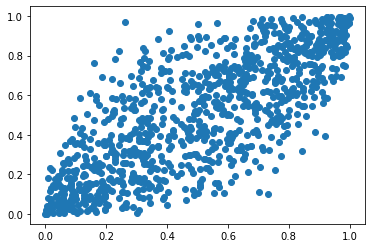

In [117]:
plt.scatter(v3, u3)

In [118]:
u3_mask = u3.copy()

In [119]:
u3_median = u3_mask.copy()

In [120]:
u3_median[:n//2] = np.median(u3[n//2:])

In [121]:
u3_mask[:n//2] = v3[:n//2]  

In [122]:
np.linalg.norm(u3_mask[:n//2] - u3[:n//2], ord=1) / np.linalg.norm(u3_median[:n//2] - u3[:n//2], ord=1)

0.595760474812281